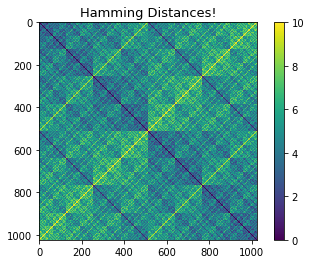

In [1]:
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline


def hammingDistance(n1, n2):
    return bin(np.bitwise_xor(n1, n2)).count("1")

N = 10  # binary code of length N
D = 6  # with minimum distance D

M = 2**N  # number of unique codes in general

# construct hamming distance matrix
A = np.zeros((M, M), dtype=int)
for i in range(M):
    for j in range(i+1, M):
        A[i, j] = hammingDistance(i, j)
A += A.T

plt.imshow(A); plt.colorbar();
plt.title("Hamming Distances!", fontsize=13);

#### Finding the maximal group of numbers with >= D for initial number "i" 

O(n!) - for a given set of numbers, find a sub-set that each of its numbers are at least D from the first number in numbers

For instance - for a set that contains number 2 ('0...010'), construct the maximal group of numbers with minimum hamming-distance D

In [2]:
def recursivly_find_legit_numbers(nums, codes=set()):
    
    codes_to_probe = nums
    for num1 in nums:
        codes.add(num1)
        codes_to_probe = codes_to_probe - {num1}
        for num2 in nums - {num1}:
            if A[num1, num2] < D:
                "Distance isn't sufficient, remove this number from set"
                codes_to_probe = codes_to_probe - {num2}

        if len(codes_to_probe):
            recursivly_find_legit_numbers(codes_to_probe, codes)
            
        return codes


In [3]:
group_of_codes = {}
for i in tqdm(range(M)):
    satisfying_numbers = np.where(A[i] >= D)[0]
    satisfying_numbers = satisfying_numbers[satisfying_numbers > i]
    nums = set(satisfying_numbers)
    if len(nums) == 0:
        continue
    group_of_codes[i] = recursivly_find_legit_numbers(nums, set())
    group_of_codes[i].add(i)


100%|█████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:01<00:00, 515.42it/s]


In [4]:
largest_group = 0
for i, nums in group_of_codes.items():
    if len(nums) > largest_group:
        largest_group = len(nums)
        ind = i

print(f"largest group for N={N} and D={D}: {largest_group}")
print("Number of unique groups:", len(group_of_codes))

largest group for N=10 and D=6: 6
Number of unique groups: 992


In [5]:
# generate largest group of codes

[format(num, f"0{N}b") for num in group_of_codes[ind]]

['0110100001',
 '0001000010',
 '1100001100',
 '1010010111',
 '1111111010',
 '0001111101']

In [6]:
# generate codes

# select binary-codes where the smallest code is 4
[format(num, f"0{N}b") for num in group_of_codes[4 - 1]]

['1011000100', '0000000011', '1111111011', '0000111100']

In [7]:
# select binary-codes where the smallest code is 100
[format(num, f"0{N}b") for num in group_of_codes[100 - 1]]

['1100001010', '0001100011', '0010000100', '1111111101']

### Second approach

Generate random bit strings and check hamming distance between them, gradually build a list of strings that fulfills the requirement

In [8]:
N = 16  # binary code of length N
D = 6  # with minimum distance D

hamm_list = []
tested = [0]  # exclude 0 in codes
indices = np.arange(2**N)


required_size = 30

In [9]:
while len(hamm_list) < required_size:
    
    if len(tested + hamm_list) == 2**N:
        print(f"could not find subset of {required_size} in this simulation. Exiting...")
        break
        
    test_candidate = np.random.choice(np.setxor1d(indices, tested + hamm_list))
    
    valid = True
    for num in hamm_list:
        if hammingDistance(test_candidate, num) < D:
            valid = False
            break
    
    if valid:
        hamm_list.append(test_candidate)
        #print("hamm_list size", len(hamm_list))
    else:
        tested += [test_candidate]
    
[format(num, f"0{N}b") for num in hamm_list]

['0001101010000110',
 '1111110000110101',
 '0110101010111100',
 '1010010111001101',
 '0100011110011111',
 '0110100110000011',
 '0100000111101001',
 '1011100001001000',
 '0011010010100100',
 '1010001011100001',
 '0000011101110000',
 '1101101011110011',
 '0001110111110101',
 '0001001000011011',
 '1110011011001010',
 '1001000111100110',
 '0011111101000010',
 '1111001100111000',
 '1000101101000100',
 '1000110010100010',
 '1101010000001001',
 '0110110001110010',
 '0001101100101101',
 '0110110100001100',
 '1011010100010110',
 '1100010101111110',
 '1101100111011100',
 '1000111000011101',
 '0010000001011110',
 '1000000000010000']